# Python Curvefitting

## Typical steps:

We are using the scipy curve_fit.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html 
We are following the example outlined there.

1. Define the fitting function.
2. Get the data.
3. Fit the data.
4. Plot/Print the data.
5. Additional Options

# Code Steps

In [6]:
#matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

## define function

In [7]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

## Data
we are creating the data here. 
We created the data from function and added a random noise to it.

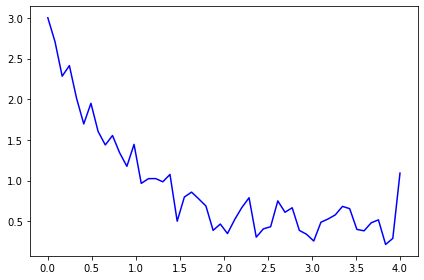

In [8]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
fit= plt.plot(xdata, ydata, 'b-', label='data')

In [9]:
len(ydata)

50

## Fitting the data

### Simple fit

[2.50193984 1.30764921 0.44834862]


array([0.10824171, 0.12260952, 0.04756582])

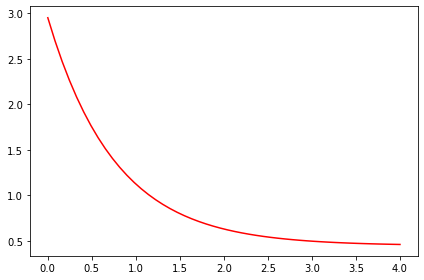

In [10]:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
perr = np.sqrt(np.diag(pcov))
perr

### Constraining the fit.

[2.40575447 1.         0.33676386]


array([0.10712557, 0.11394351, 0.06811625])

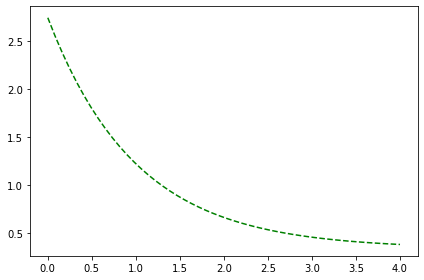

In [11]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
perr = np.sqrt(np.diag(pcov))
perr

## Plotting the data together.

[2.26917524 1.27285418 0.50144223]
[0.1208098  0.14903167 0.05494257]
[2.19606707 1.         0.40791271]
[0.11588815 0.13503338 0.07368797]


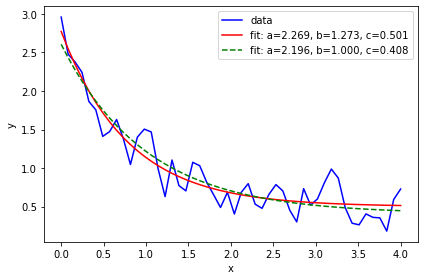

In [12]:

# Step 2.2
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
fit= plt.plot(xdata, ydata, 'b-', label='data')

#Step 2.3
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
perr = np.sqrt(np.diag(pcov))
print(perr)


#Step 2.4
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [13]:
pcov

array([[ 0.01343006,  0.00284993, -0.00197203],
       [ 0.00284993,  0.01823401,  0.00822088],
       [-0.00197203,  0.00822088,  0.00542992]])

## Additional fitting parameters

### p0 = Initial parameters
> Initial guess for the parameters (length N). If None, then the initial values will all be 1 (if the number of parameters for the function can be determined using introspection, otherwise a ValueError is raised).

### sigmaNone or M-length sequence or MxM array, optional
> Determines the uncertainty in ydata. If we define residuals as r = ydata - f(xdata, *popt), then the interpretation of sigma depends on its number of dimensions:

> A 1-D sigma should contain values of standard deviations of errors in ydata. In this case, the optimized function is chisq = sum((r / sigma) ** 2).

> A 2-D sigma should contain the covariance matrix of errors in ydata. In this case, the optimized function is chisq = r.T @ inv(sigma) @ r

### absolute_sigmabool, optional
>If True, sigma is used in an absolute sense and the estimated parameter covariance pcov reflects these absolute values.

>If False (default), only the relative magnitudes of the sigma values matter. The returned parameter covariance matrix pcov is based on scaling sigma by a constant factor. This constant is set by demanding that the reduced chisq for the optimal parameters popt when using the scaled sigma equals unity. In other words, sigma is scaled to match the sample variance of the residuals after the fit. Default is False. Mathematically, pcov(absolute_sigma=False) = pcov(absolute_sigma=True) * chisq(popt)/(M-N)

### check_finitebool, optional
> If True, check that the input arrays do not contain nans of infs, and raise a ValueError if they do. Setting this parameter to False may silently produce nonsensical results if the input arrays do contain nans. Default is True.

### bounds2-tuple of array_like, optional
>Lower and upper bounds on parameters. Defaults to no bounds. Each element of the tuple must be either an array with the length equal to the number of parameters, or a scalar (in which case the bound is taken to be the same for all parameters). Use np.inf with an appropriate sign to disable bounds on all or some parameters.


**In our example**
* We applied the upper bounds for each.
* Not sure if 0, set all the lower bounds to 0.


### Fit Parameter Errors and pcov
>The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).

>How the sigma parameter affects the estimated covariance depends on absolute_sigma argument, as described above.

>If the Jacobian matrix at the solution doesn’t have a full rank, then ‘lm’ method returns a matrix filled with np.inf, on the other hand ‘trf’ and ‘dogbox’ methods use Moore-Penrose pseudoinverse to compute the covariance matrix.


### Errors 
 popt, pcov = curve_fit(f, xdata, ydata)

 perr = np.sqrt(np.diag(pcov))  
 residuals = residuals = ydata- f(xdata, *popt)
 ss_res = numpy.sum(residuals**2) = BestNorm from MPFIT   
 
 https://www.l3harrisgeospatial.com/docs/mpfitexpr.html
 
 r_squared = 1 - (ss_res / ss_tot)

# Interactive 

In [17]:
%matplotlib osx
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

test_x = np.linspace(0.0,100.0,100)
test_y = np.sin(x)
#global counter
count = 0

def main():
    fig = plt.figure()
    cid = fig.canvas.mpl_connect('button_press_event', mouse_event)
    x = test_x
    y = test_y

    plt.plot(x, y)
    
    plt.show()
    
    
def counter():
    global count
    count+= 1
    if count == 4:
        plt.clf()
        plt.plot(x,y)
        plt.draw()
        count = 0

def mouse_event(event):
    print(f'xdata: {event.xdata} and ydata: {event.ydata}')
    print(f'x: {event.x} and y: {event.y}')
    
    #print(f'button: {event.button}')
    #plt.clf()
    #plt.plot(x,y)
    plt.axvline(x=event.xdata, linestyle ='--', color="r")
    plt.draw()
    counter()
     
main()




xdata: 47.30935251798562 and ydata: 0.20897096329872067
x: 722 and y: 430
xdata: 76.5998201438849 and ydata: 0.29064738484136043
x: 1051 and y: 452
xdata: 62.26618705035972 and ydata: 0.22753378637659338
x: 890 and y: 435
xdata: 54.25359712230217 and ydata: 0.3314855956126803
x: 800 and y: 463
